<a href="https://colab.research.google.com/github/eduardogranillo/FisicaComputacional/blob/master/Evaluaci%C3%B3n3/Evaluaci%C3%B3n3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tercera Evaluación de Física Computacional 1 (2021-1)

(3 de Mayo de 2021)

La [Ecuación de Reacción-Difusión](https://en.wikipedia.org/wiki/Reaction–diffusion_system) en una dimensión está dada por la ecuación diferencial parcial

\begin{equation*}
\frac{\partial u}{\partial t} = D \frac{\partial^2 u}{\partial x^2} + R(u)
\end{equation*}

donde $D$ es el coeficiente de difusión y $R(u)$ es una función de reacción. La forma de la función $R(u)$, puede describir una colección amplia de fenómenos físicos. 

Comúnmente la ecuación de reacción difusión se utiliza para estudiar la evolución temporal de una mezcla de componentes químicos que reaccionan entre si, por ejemplo

\begin{equation*}
2 H_2 + O_2 \xrightarrow[\leftarrow]{}  2 H_2 O
\end{equation*}

donde se mezclan 2 moleculas de Hidrógeno y una oxígeno, para formar agua, con ayuda de un catalizador que facilite la reacción.

Se pide trabajar el caso donde $R(u) = \alpha u$, 
siendo $\alpha$ el coeficiente de reacción. 

Entonces nos interesa resolver la ecuación

\begin{equation*}
\frac{\partial u}{\partial t} = D \frac{\partial^2 u}{\partial x^2} + \alpha u
\end{equation*}

Aquí $u$ denotaría la concentración del compuesto químico. Si $\alpha=0$, la ecuación anterior se reduce a una simple ecuación de difusión como la que vimos en la ecuación del calor. 

Supondremos que $D=1$ y $\alpha=-1$. 

Resuelve numéricamente la ecuación de reacción-difusión en una dimensión, para estudiar la evolución de un modelo simple de reacción-difusión de mezclar moleculas de $2 H_2$ con $O_2$
en un tubo unidimensional de longitud $L=1$ en la dirección $x$, y que inicialmente se encuentra vacío $u(x,0)=0$ como se muestra en la siguiente figura


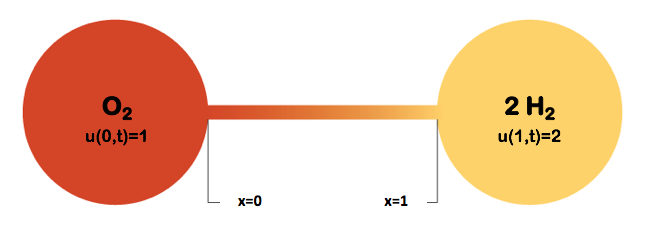


Se pide adaptar el código desarrolado en el sitio del curso de [Numerical Methods using Python](http://people.bu.edu/andasari/courses/numericalpython/python.html) del Dr. Vivi Andasari de la Universidad de Boston.

En la [sesión 15](http://people.bu.edu/andasari/courses/Fall2015/LectureNotes/Lecture15_29Oct2015.pdf), se describen los algoritmos por si desean consultar los detalles. Se resuelve la ecuación de Reacción-Difusión en una dimensión, usando métodos de diferencia finita (Backward Time Centered Space - BTCS).  Se provee el código para problemas de condiciones a la frontera [tipo Dirichlet](http://people.bu.edu/andasari/courses/numericalpython/Week9Lecture15/PythonFiles/BTCS_DirichletBCs.py) y también para el [tipo Neumann](http://people.bu.edu/andasari/courses/numericalpython/Week9Lecture15/PythonFiles/BTCS_NeumannBCs.py).

Por favor descarga ambos códigos para cada caso, dado que se utilizarán en los siguientes 2 problemas.  


**Problema 1:** 

Resuelve numéricamente la ecuación de reacción-difusión para el caso de condiciones de frontera tipo Dirichlet por el método de BTCS, con condición inicial $u(x,0)=0$, y condiciones a la frontera $u(0,t)=1$ y $u(1,t)=2$, para un tiempo $t=0,..,1$.

Muestra una gráfica de la evolución temporal de la reacción difusión de los compuestos.



True


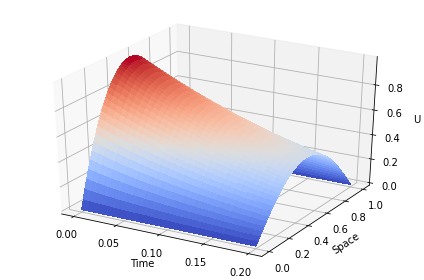

In [8]:
# CÓDIGO SIN MODIFICAR DE LA UNIVERSIDAD DE BOSTON

'''
Backward method to solve 1D reaction-diffusion equation:
    u_t = D * u_xx + alpha * u
    
with Dirichlet boundary conditions u(x0,t) = 0, u(xL,t) = 0
and initial condition u(x,0) = 4*x - 4*x**2
'''

import numpy as np
from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm


M = 50 # GRID POINTS on space interval
N = 60 # GRID POINTS on time interval

x0 = 0
xL = 1

# ----- Spatial discretization step -----
dx = (xL - x0)/(M - 1)

t0 = 0
tF = 0.2

# ----- Time step -----
dt = (tF - t0)/(N - 1)

D = 0.1  # Diffusion coefficient
alpha = -3 # Reaction rate

r = dt*D/dx**2
s = dt*alpha;

xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M-2))
off_diag = -r*np.ones((1, M-3))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()

# ----- Initializes matrix U -----
U = np.zeros((M, N))

#----- Initial condition -----
U[:,0] = 4*xspan - 4*xspan**2

#----- Dirichlet boundary conditions -----
U[0,:] = 0.0 
U[-1,:] = 0.0

for k in range(1, N):
    c = np.zeros((M-4,1)).ravel()
    b1 = np.asarray([r*U[0,k], r*U[-1,k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[1:M-1, k-1])
    b = b1 + b2  # Right hand side
    U[1:M-1, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Checks if the solution is correct:
g = np.allclose(np.dot(A,U[1:M-1,N-1]), b)
print(g)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.coolwarm, antialiased=False)

ax.set_xticks([0, 0.05, 0.1, 0.15, 0.2])

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
plt.tight_layout()
plt.show()

r = 22.043478260869566


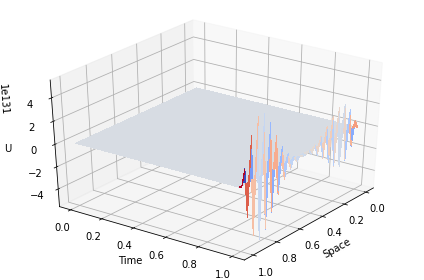

In [13]:
'''
Forward method to solve 1D reaction-diffusion equation:
    u_t = D * u_xx + alpha * u
    
with Dirichlet boundary conditions u(x0,t) = 0, u(xL,t) = 0
and initial condition u(x,0) = 4*x - 4*x**2
'''


import numpy as np
from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm


M = 40 # GRID POINTS on space interval
N = 70 # GRID POINTS on time interval

x0 = 0
xL = 1

# ----- Spatial discretization step -----
dx = (xL - x0)/(M - 1)

t0 = 0
tF = 1.0

# ----- Time step -----
dt = (tF - t0)/(N - 1)

D = 1  # Diffusion coefficient
alpha = -1 # Reaction rate

r = dt*D/dx**2
s = dt*alpha;

print(f'r = {r}')

# ----- Creates grids -----
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

# ----- Initializes matrix solution U -----
U = np.zeros((M, N))

# ----- Initial condition -----
U[:,0] = 0.0

# ----- Dirichlet Boundary Conditions -----
U[0,:] = 1.0
U[-1,:] = 2.0

# ----- Equation (15.8) in Lecture 15 -----
for k in range(0, N-1):
    for i in range(1, M-1):
        U[i, k+1] = r*U[i-1, k] + (1-2*r+s)*U[i,k] + r*U[i+1,k] 

T, X = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

#ax.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
#ax.set_yticks([0, 0.05, 0.1, 0.15, 0.2])

ax.set_xlabel('Space')
ax.set_ylabel('Time')
ax.set_zlabel('U')
ax.view_init(elev=33, azim=36)
plt.tight_layout()
plt.show()

Lo primero que se hizo fue cambiar los parámetros: el tiempo se extendió hasta 1, se cambiaron los valores para alpha y D, así como también la condición inicial y los valores de frontera de tipo Dirichlet. Todo esto para resolver la ecuación de acuerdo a los datos que da el problema. Por último se eliminaron los dominios fijos de la gráfica para que se mostrara todo.

Sin embargo, la gráfica resultante no se adecúa a lo esperado ya que no coincide con los valores en la frontera que pensé que había determinado.

El error que cometí fue que había implementado el código de tipo forward time central space (FTCS) cuando el que funciona como vemos es el backward time central space (BTCS), es interesante ver cómo truena pero ahora si se muestra de la manera correcta:

True


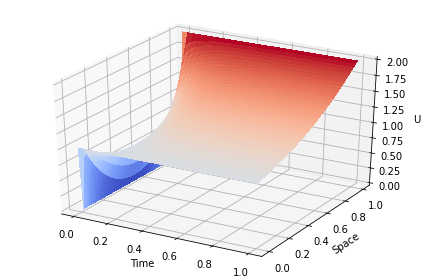

In [30]:
# Solución Problema 1

'''
Backward method to solve 1D reaction-diffusion equation:
    u_t = D * u_xx + alpha * u
    
with Dirichlet boundary conditions u(x0,t) = 0, u(xL,t) = 0
and initial condition u(x,0) = 4*x - 4*x**2
'''

import numpy as np
from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm


M = 50 # GRID POINTS on space interval
N = 60 # GRID POINTS on time interval

x0 = 0
xL = 1

# ----- Spatial discretization step -----
dx = (xL - x0)/(M - 1)

t0 = 0
tF = 1

# ----- Time step -----
dt = (tF - t0)/(N - 1)

D = 1  # Diffusion coefficient
alpha = -1 # Reaction rate

r = dt*D/dx**2
s = dt*alpha;

xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M-2))
off_diag = -r*np.ones((1, M-3))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()

# ----- Initializes matrix U -----
U = np.zeros((M, N))

#----- Initial condition -----
U[:,0] = 0

#----- Dirichlet boundary conditions -----
U[0,:] = 1.0 
U[-1,:] = 2.0

for k in range(1, N):
    c = np.zeros((M-4,1)).ravel()
    b1 = np.asarray([r*U[0,k], r*U[-1,k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[1:M-1, k-1])
    b = b1 + b2  # Right hand side
    U[1:M-1, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Checks if the solution is correct:
g = np.allclose(np.dot(A,U[1:M-1,N-1]), b)
print(g)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.coolwarm, antialiased=False)

# ax.set_xticks([0, 0.05, 0.1, 0.15, 0.2])

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
#ax.view_init(elev=33, azim=35)
plt.tight_layout()
plt.show()

En este resultado se puede apreciar la evolución de la reacción difusión de los compuestos, se observa en los primeros 0.2 segundos hay un cambio brusco en las dos moléculas, después ya se funden y no hay un cambio muy apreciable una vez pasado este tiempo.

**Problema 2:**

Ahora supondremos que se colocan reguladores de presión, que permiten flujo de los gases desde los reservorios hacia el tubo inicialmente vacío $u(x,0) = 0$. En $x=0$, el flujo de gas es $\partial u/\partial x (0,t) = 0.1$  y en $x=1$ el flujo $\partial u/\partial x (1,t) = 0.2$.

Se pide realizar una simulación numérica de este escenario para $=0,..,10$.


True


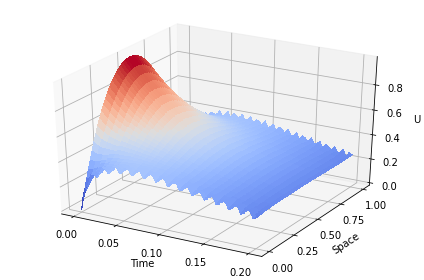

In [31]:
# CÓDIGO SIN MODIFICAR DE LA UNIVERSIDAD DE BOSTON

'''
Backward method to solve 1D reaction-diffusion equation:
    u_t = D * u_xx + alpha * u
    
with Neumann boundary conditions 
at x=0: u_x = sin(pi/2)
at x=L: u_x = sin(3*pi/4) with L=1
and initial condition u(x,0) = 4*x - 4*x**2
'''

import numpy as np
from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm


M = 50 # GRID POINTS on space interval
N = 60 # GRID POINTS on time interval

x0 = 0
xL = 1

# ----- Spatial discretization step -----
dx = (xL - x0)/(M - 1)

t0 = 0
tF = 0.2

# ----- Time step -----
dt = (tF - t0)/(N - 1)

D = 0.5  # Diffusion coefficient
alpha = -5 # Reaction rate

r = dt*D/dx**2
s = dt*alpha
a = 1 + 2*r - s


xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M))
off_diag = -r*np.ones((1, M-1))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()
A[0,1] = -2*r
A[M-1,M-2] = -2*r

# ----- Initializes matrix U -----
U = np.zeros((M, N))

#----- Initial condition -----
U[:,0] = 4*xspan - 4*xspan**2

#----- Neumann boundary conditions -----
leftBC = np.arange(1, N+1)
f = np.sin(leftBC*np.pi/2)

rightBC = np.arange(1, N+1)
g = np.sin(3*rightBC*np.pi/4)


for k in range(1, N):
    c = np.zeros((M-2,1)).ravel()
    b1 = np.asarray([2*r*dx*f[k], 2*r*dx*g[k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[0:M, k-1])
    b = b1 + b2  # Right hand side
    U[0:M, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Checks if the solution is correct:
gc = np.allclose(np.dot(A,U[0:M,N-1]), b)
print(gc)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.coolwarm, antialiased=False)

ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
ax.set_xticks([0, 0.05, 0.1, 0.15, 0.2])

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
plt.tight_layout()
plt.show()

Lo que haremos es modificar los parámetros para que se ajuste a los de nuestro problema: el tiempo final lo limitamos hasta 10, cambiamos los valores de D y de alpha, la condición inicial es del tubo vacío por lo que es 0, también hay que modificar las condiciones de frontera de tipo Neumanna 0.1 en x=0 y 0.2 en x=1. Esto sin olvidar eliminar (o comentar) los ejes fijados del problema original hecho por el Dr. Vivi Andasari.


In [32]:
'''
Backward method to solve 1D reaction-diffusion equation:
    u_t = D * u_xx + alpha * u
    
with Neumann boundary conditions 
at x=0: u_x = sin(pi/2)
at x=L: u_x = sin(3*pi/4) with L=1
and initial condition u(x,0) = 4*x - 4*x**2
'''

import numpy as np
from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm


M = 50 # GRID POINTS on space interval
N = 60 # GRID POINTS on time interval

x0 = 0
xL = 1

# ----- Spatial discretization step -----
dx = (xL - x0)/(M - 1)

t0 = 0
tF = 10

# ----- Time step -----
dt = (tF - t0)/(N - 1)

D = 1  # Diffusion coefficient
alpha = -1 # Reaction rate

r = dt*D/dx**2
s = dt*alpha
a = 1 + 2*r - s


xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M))
off_diag = -r*np.ones((1, M-1))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()
A[0,1] = -2*r
A[M-1,M-2] = -2*r

# ----- Initializes matrix U -----
U = np.zeros((M, N))

#----- Initial condition -----
U[:,0] = 0

#----- Neumann boundary conditions -----
leftBC = np.arange(1, N+1)
f = 0.1

rightBC = np.arange(1, N+1)
g = 0.2


for k in range(1, N):
    c = np.zeros((M-2,1)).ravel()
    b1 = np.asarray([2*r*dx*f[k], 2*r*dx*g[k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[0:M, k-1])
    b = b1 + b2  # Right hand side
    U[0:M, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Checks if the solution is correct:
gc = np.allclose(np.dot(A,U[0:M,N-1]), b)
print(gc)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.coolwarm, antialiased=False)

# ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
# ax.set_xticks([0, 0.05, 0.1, 0.15, 0.2])

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
plt.tight_layout()
plt.show()

TypeError: ignored

Aquí nos saltó un error:

TypeError: 'float' object is not subscriptable

en la línea 71 donde se define b1 como


```
 b1 = np.asarray([2*r*dx*f[k], 2*r*dx*g[k]])
 ```

 Esto puede ser debido a que nuestras funciones no dependen de k, para solucionarlo cambiaremos f y g por sus valores constantes, quedando:

 ```
 b1 = np.asarray([2*r*dx*0.1, 2*r*dx*0.2])
 ```
Ahora si veamos la solución


True


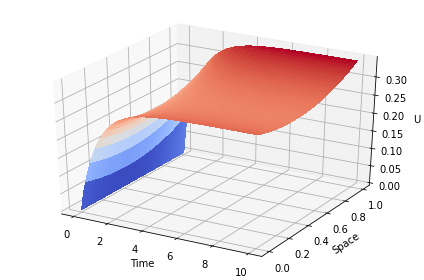

In [34]:
# Solución Problema 2

'''
Backward method to solve 1D reaction-diffusion equation:
    u_t = D * u_xx + alpha * u
    
with Neumann boundary conditions 
at x=0: u_x = sin(pi/2)
at x=L: u_x = sin(3*pi/4) with L=1
and initial condition u(x,0) = 4*x - 4*x**2
'''

import numpy as np
from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm


M = 50 # GRID POINTS on space interval
N = 60 # GRID POINTS on time interval

x0 = 0
xL = 1

# ----- Spatial discretization step -----
dx = (xL - x0)/(M - 1)

t0 = 0
tF = 10

# ----- Time step -----
dt = (tF - t0)/(N - 1)

D = 1  # Diffusion coefficient
alpha = -1 # Reaction rate

r = dt*D/dx**2
s = dt*alpha
a = 1 + 2*r - s


xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M))
off_diag = -r*np.ones((1, M-1))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()
A[0,1] = -2*r
A[M-1,M-2] = -2*r

# ----- Initializes matrix U -----
U = np.zeros((M, N))

#----- Initial condition -----
U[:,0] = 0

#----- Neumann boundary conditions -----
leftBC = np.arange(1, N+1)
f = 0.1

rightBC = np.arange(1, N+1)
g = 0.2


for k in range(1, N):
    c = np.zeros((M-2,1)).ravel()
    b1 = np.asarray([2*r*dx*0.1, 2*r*dx*0.2])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[0:M, k-1])
    b = b1 + b2  # Right hand side
    U[0:M, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Checks if the solution is correct:
gc = np.allclose(np.dot(A,U[0:M,N-1]), b)
print(gc)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.coolwarm, antialiased=False)

# ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
# ax.set_xticks([0, 0.05, 0.1, 0.15, 0.2])

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
plt.tight_layout()
plt.show()

Analizando la gráfica podemos ver algo parecido a la anterior en cuanto al comportamiento: en los primeros 4 segundos aproximadamente ocurre un intercambio muy drástico en los compuestos, después de ahi se nivela y no ocurre una variación muy grande. También es interesante ver que en x=1 está mas pronunciada la curva debido a que el flujo es mayor. También podemos afirmar que con estos reguladores de presión la estabilización de los compuestos se da de manera mas suave, comparando con la anterior.



**Problema 3:**

¿Que pasaría en el caso de que se mezclaran dos gases que no reaccionan entre si, como sería mezclar dos recipientes con el  mismo tipo de gas (el coeficiente de reacción $\alpha=0$)?.

Suponga que inicialmente el tubo está vacío $u(x,0)=0$ y la concentración en $u(0,t)=1$ y $u(1,t)=2$.

Resuelva numéricamente este caso. 

Para resolver este problema utilizaremos el mismo código del problema 1 ya que se trata de condiciones en la frontera tipo Dirichlet, modificaremos el valor de alpha, la condición inicial y los valores de frontera como ya mencionamos.

True


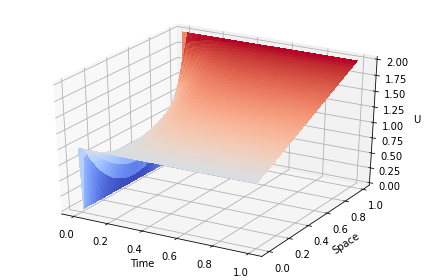

In [37]:
# Solución Problema 3

'''
Backward method to solve 1D reaction-diffusion equation:
    u_t = D * u_xx + alpha * u
    
with Dirichlet boundary conditions u(x0,t) = 0, u(xL,t) = 0
and initial condition u(x,0) = 4*x - 4*x**2
'''

import numpy as np
from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm


M = 50 # GRID POINTS on space interval
N = 60 # GRID POINTS on time interval

x0 = 0
xL = 1

# ----- Spatial discretization step -----
dx = (xL - x0)/(M - 1)

t0 = 0
tF = 1

# ----- Time step -----
dt = (tF - t0)/(N - 1)

D = 1  # Diffusion coefficient
alpha = 0 # Reaction rate

r = dt*D/dx**2
s = dt*alpha;

xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M-2))
off_diag = -r*np.ones((1, M-3))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()

# ----- Initializes matrix U -----
U = np.zeros((M, N))

#----- Initial condition -----
U[:,0] = 0

#----- Dirichlet boundary conditions -----
U[0,:] = 1.0 
U[-1,:] = 2.0

for k in range(1, N):
    c = np.zeros((M-4,1)).ravel()
    b1 = np.asarray([r*U[0,k], r*U[-1,k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[1:M-1, k-1])
    b = b1 + b2  # Right hand side
    U[1:M-1, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Checks if the solution is correct:
g = np.allclose(np.dot(A,U[1:M-1,N-1]), b)
print(g)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.coolwarm, antialiased=False)

# ax.set_xticks([0, 0.05, 0.1, 0.15, 0.2])

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
#ax.view_init(elev=33, azim=35)
plt.tight_layout()
plt.show()

Para comparar traigamos la imagen del problema uno donde alpha equivale a 1. 
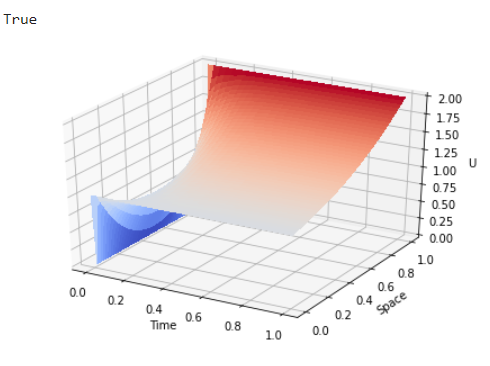

Como vemos no hay mucha diferencia entre los dos, por lo que el coeficiente de reacción no aporta un cambio muy significativo, al menos a gran escala o a la escala de nuestro resultado. Lo que si se puede apreciar es que en x=1 la pendiente está mas pronunciada, por lo que podemos afirmar que cuando el alpha tiene valor 0.1 el intercambio en las moléculas se da de manera más rápida y se tenderá al equilibrio antes.

**NOTA:** 
Describa en cada problema, lo que se realiza y comente los resultados de su simulación. Si hay alguna observación o comentario adicional que desee hacer, hágalo por favor.  

Al finalizar la evaluación, por favor guarde su cuaderno de Jupyter llamado *Evaluación3* en su repositorio Github del curso y anote su avance. 

Gracias por participar. 
¡Suerte!
